In [1]:
import pandas as pd

In [4]:
df_reviews=pd.read_csv('sample_data/IMDB_DATASET.csv')

In [12]:
#take a sample of 10000 rows to make processing faster and get imbalance
df_positive=df_reviews[df_reviews['sentiment']=='positive'][:9000]  #selects positive sentiments

In [13]:
#now lets get the first 1000 negative reviews
df_negative=df_reviews[df_reviews['sentiment']=='negative'][:1000]

In [15]:
#concatenate  the dataframe to get a single dataframe of the two
df_reviews_imb=pd.concat([df_positive,df_negative])   #combines the dataframe vertically

In [20]:
df_reviews_imb.value_counts('sentiment')    #verify the data is imbalanced

,count
sentiment,
positive,9000
negative,1000


**2 Dealing with Imbalanced classes**

<Axes: xlabel='sentiment'>

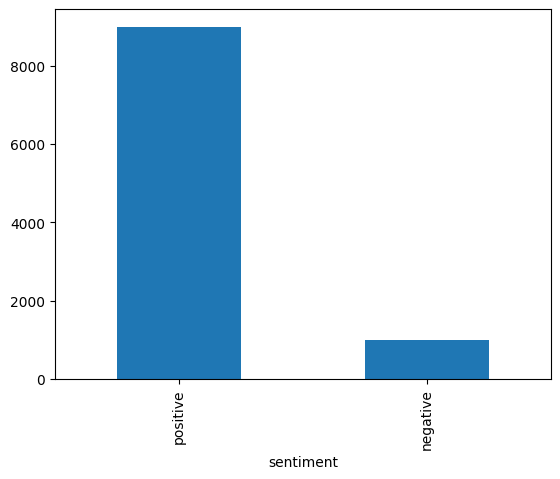

In [22]:
#make a barplot to show how data is distributed. Shows data distribution
df_reviews_imb.value_counts('sentiment').plot(kind='bar')

**2.1 Balancing data with .sample()**

In [25]:
#we get the length of our data set using len function
length_negative=len(df_reviews_imb[df_reviews_imb['sentiment']=='negative'])
length_negative

1000

In [27]:
#we extract only a sample of 1000 from the positive reviews
df_reviews_positive=df_reviews_imb[df_reviews_imb['sentiment']=='positive'].sample(n=length_negative)

In [30]:
df_revies_negative=df_reviews_imb[df_reviews_imb['sentiment']=='negative']

In [33]:
df_reviews_bal=pd.concat([df_reviews_positive, df_revies_negative])

In [34]:
#verify the data is balanced
df_reviews_bal.value_counts('sentiment')

,count
sentiment,
negative,1000
positive,1000


In [36]:
#Because we sampled 1000 from our majority class the indexes in our new df have not been set
df_reviews_bal.reset_index(drop=True, inplace=True)


In [37]:
#View
df_reviews_bal

,review,sentiment
0,I totally disagree with the other reviews.All ...,positive
1,"While there aren't any talking animals, big la...",positive
2,Sir Arthur Conan Doyle wrote a fair number of ...,positive
3,I've watched the movie actually several times....,positive
4,The villian in this movie is one mean sob and ...,positive
...,...,...
1995,Stranded in Space (1972) MST3K version - a ver...,negative
1996,"I happened to catch this supposed ""horror"" fli...",negative
1997,waste of 1h45 this nasty little film is one to...,negative
1998,Warning: This could spoil your movie. Watch it...,negative


**2.2 Balancing data with RandomUnderSampler**

In [38]:
pip install imblearn

In [41]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(random_state=0)

#first argument is a dataframe while the second argument is a series
df_review_bal, df_review_bal['sentiment']=rus.fit_resample(df_reviews_imb[['review']],df_reviews_imb['sentiment'])

In [43]:
df_review_bal.value_counts('sentiment')

,count
sentiment,
negative,1000
positive,1000


In [45]:
#set the index
df_review_bal.reset_index(drop=True, inplace=True)

df_review_bal

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,Knute Rockne led an extraordinary life and his...,positive
1996,At the height of the 'Celebrity Big Brother' r...,positive
1997,This is another of Robert Altman's underrated ...,positive
1998,This movie won a special award at Cannes for i...,positive


**3 Splitting data into train and test**

In [48]:
#import train_test_split
#train-Used to feed the model, while test provide evaluation of our model

from sklearn.model_selection import train_test_split

#we set 30% of the data to the test data and the remaining 67% willbe set to the training data
train,test=train_test_split(df_review_bal,test_size=0.33,
                             random_state=42)

In [52]:
#display the train dataset. ---We have 67% of the data
train

,review,sentiment
81,"I just got back from this free screening, and ...",negative
915,Claire Denis's movies seem to fall into one of...,negative
1018,"One must admit, that Dev has an eye for beauty...",positive
380,Mario Lewis of the Competitive Enterprise Inst...,negative
1029,"The first, and far better, of Kevin Kline's tw...",positive
...,...,...
1130,I saw the movie in Izmir as the closing film o...,positive
1294,This is a great documentary and above comments...,positive
860,"Obviously, the comments above that fawn over t...",negative
1459,Robert Carlyle excels again. The period was ca...,positive


In [51]:
#show the test df. ----We have 33% of the data
test

,review,sentiment
1860,Refreshing `lost' gem! Featuring effective dia...,positive
353,Never saw the original movie in the series...I...,negative
1333,"Once upon a time, in Sweden, there was a poor ...",positive
905,"At the beginning of the film, you might double...",negative
1289,Another Spanish movie about the 1936 Civil War...,positive
...,...,...
118,"I have seen most, if not all of the Laurel & H...",negative
1249,D.W. Griffith could have made any film he want...,positive
1993,"Cardiff, Wales. A bunch of 5 mates are deeply ...",positive
522,I rented this movie with my friend for a good ...,negative


In [54]:
#set our independent and dependent varaibles in our train and test df
#In our data review is the indepent variable while sentiment is the independent variable
train_x, train_y=train['review'], train['sentiment']


In [53]:
#lets do the same for our test data set
test_x, test_y=train['review'], test['sentiment']

In [57]:
train_x
train_y.value_counts()

,count
sentiment,
negative,675
positive,665
